<a href="https://colab.research.google.com/github/AndreyPerunov/Personality-Prediction/blob/main/PersonalityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Personality

## Imports

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Portfolio item 1: Exploratory analysis and data preprocessing

Task:

> Choose a dataset for classification problem that is complex enough to illustrate exploratory analysis and data preprocessing techniques. First, perform an overview of the dataset (exploratory analysis) then do the preprocessing step to get the data ready for ML models training.

### Fetching the Dataset

In [2]:
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

### Loading the dataset

In [3]:
df = pd.read_csv(path + '/personality_dataset.csv')
print(df.head())
print(df.shape)

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  
(2900, 8)


### Checking for Missing Values

In [4]:
print(df.isnull().sum())

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


### Analysis

About the dataset (quote from kaggle)

> This dataset contains 2,900 entries with 8 features related to social behavior and personality traits, designed to explore and classify individuals as Extroverts or Introverts.

 Dataset has **missing values** - *filling in missing values* is required

 Dataset has this types of features:

  - `Time_spent_Alone` - Numeric feature
  - `Stage_fear` - Binary Feature
  - `Social_event_attendance` - Ordinal feature (scale 0-10)
  - `Going_outside` - Ordinal feature (scale 0-10)
  - `Drained_after_socializing` - Binary Feature
  - `Friends_circle_size` - Numeric feature
  - `Post_frequency` - Numeric feature
  - `Personality` - Binary Feature (Target Feature)

### Filling in Missing Values

In [5]:
median_time_spent_alone = df['Time_spent_Alone'].median()
df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(median_time_spent_alone)

most_frequent_stage_fear = df['Stage_fear'].mode()[0]
df['Stage_fear'] = df['Stage_fear'].fillna(most_frequent_stage_fear)

median_social_event_attendance = df['Social_event_attendance'].median()
df['Social_event_attendance'] = df['Social_event_attendance'].fillna(median_social_event_attendance)

median_going_outside = df['Going_outside'].median()
df['Going_outside'] = df['Going_outside'].fillna(median_going_outside)

most_frequent_drained_after_socializing = df['Drained_after_socializing'].mode()[0]
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(most_frequent_drained_after_socializing)

median_friends_circle_size = df['Friends_circle_size'].median()
df['Friends_circle_size'] = df['Friends_circle_size'].fillna(median_friends_circle_size)

median_post_frequency = df['Post_frequency'].median()
df['Post_frequency'] = df['Post_frequency'].fillna(median_post_frequency)

print(df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


### Converting Feature to Numeric Values



Value of `1` will represent `'Introvert'` category, while `0` will represent `'Extrovert'`.

In [6]:
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Introvert': 1, 'Extrovert': 0})

df_no_data_scaling = df.copy()

print(df.head())

   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0                  8.0             5.0            0  


### Scaling The Data

In [7]:
# Performing Normalization, because we know the range
df[["Social_event_attendance", "Going_outside"]] = MinMaxScaler().fit_transform(df[["Social_event_attendance", "Going_outside"]])

# Performing Standardization
df[["Time_spent_Alone", "Friends_circle_size", "Post_frequency"]] = StandardScaler().fit_transform(df[["Time_spent_Alone", "Friends_circle_size", "Post_frequency"]])

print(df.head())

   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0         -0.143788           0                      0.4       0.857143   
1          1.309119           1                      0.0       0.000000   
2          1.309119           1                      0.1       0.285714   
3         -1.306113           0                      0.6       1.000000   
4         -0.434369           0                      0.9       0.571429   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0             1.596787        0.500271            0  
1                          1            -1.471766       -0.190744            1  
2                          1            -0.291553       -0.536251            1  
3                          0             1.832829        1.536793            0  
4                          0             0.416574        0.500271            0  


## Portfolio item 2: Logistic regression

Task:

> Train Logistic Regression and estimate its performance. Choose hyperparameters.

### Defining Logistic Regression Class

$$
z = b + \sum_{j=1}^m w_j x_j \tag{Net Input}
$$

$$
\sigma(z)=\frac{1}{1+e^{-z}} \tag{Sigmoid Function}
$$

$$
f(x) = \begin{cases}
1, \quad x \geq 0 \\
0, \quad x < 0
\end{cases}
\tag{Unit Step Function}
$$

$$
J(w)=
-\sum_{i}{
  y^{(i)}\ln{\sigma^{(i)}} + (1-y^{(i)}) \ln{\big(1 - \sigma(z^{(i)})\big)}
} \tag{Cost Function}
$$

In [16]:
class LogisticRegressionGD():
  """Logistic Regression Classifier using gradient descent"""
  def __init__(self, learning_rate=0.1, max_epochs=1000, random_state=1, tol=1e-4, patience=10, verbose=False):
    self.weights = None
    self.bias = None

    self.learning_rate = learning_rate
    self.max_epochs = max_epochs
    self.tol = tol
    self.patience = patience

    self.verbose = verbose

    self.random_state = random_state

  def __net_input(self, x: np.ndarray):
    """Calculate net input"""
    return x.dot(self.weights) + self.bias

  def __activation_function(self, z: np.ndarray):
    """Compute logistic sigmoid activation"""
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    """Return class label after unit step"""
    if self.weights is None:
      raise Exception("Model has not been trained yet")

    z = self.__net_input(X)
    return np.where(self.__activation_function(z) >= 0.5, 1, 0)

  def fit(self, X: np.ndarray, y: np.ndarray):
    """Fit training data"""
    rgen = np.random.RandomState(self.random_state)

    self.weights = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.bias = rgen.normal(loc=0.0, scale=0.01)
    self.cost = []

    best_cost = np.inf
    epochs_no_improve = 0

    for epoch in range(1, self.max_epochs + 1):
      net_input = self.__net_input(X)
      output = np.clip(self.__activation_function(net_input), 1e-15, 1 - 1e-15)
      errors = (y - output)

      self.weights += self.learning_rate * X.T.dot(errors)
      self.bias += self.learning_rate * errors.sum()

      cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
      self.cost.append(cost)

      if self.verbose:
        print(f"Epoch {epoch}/{self.max_epochs} - Cost: {cost:.6f}")

      if best_cost - cost > self.tol:
        best_cost = cost
        epochs_no_improve = 0
      else:
        epochs_no_improve +=1

      if epochs_no_improve >= self.patience:
        print(f"Early stopping at epoch {epoch}")
        break

    return self

### Executing with all the features

In [21]:
observations = df.iloc[:, :-1].values
true_target_values = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(observations,
                                                    true_target_values,
                                                    test_size=0.2,
                                                    random_state=81049)

lrgd = LogisticRegressionGD(learning_rate=0.001,
                            max_epochs=10000,
                            random_state=81049,
                            tol=1e-4,
                            patience=10,
                            verbose=False)
results = lrgd.fit(X_train, y_train)

print("Classification Report (test): ", classification_report(y_test, lrgd.predict(X_test)))
print("Classification Report (train): ", classification_report(y_train, lrgd.predict(X_train)))
print("Weights: ", results.weights)
print("Bias: ", results.bias)

Early stopping at epoch 1795
Classification Report (test):                precision    recall  f1-score   support

           0       0.94      0.91      0.92       314
           1       0.90      0.93      0.91       266

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

Classification Report (train):                precision    recall  f1-score   support

           0       0.93      0.93      0.93      1177
           1       0.93      0.92      0.93      1143

    accuracy                           0.93      2320
   macro avg       0.93      0.93      0.93      2320
weighted avg       0.93      0.93      0.93      2320

Weights:  [-0.24702383  2.89101473 -0.2943886  -0.18380238  2.47978639  0.16952685
 -0.27270683]
Bias:  -2.448840248326916


## Portfolio item 3: Decision trees

Task:

> Train Decision Tree classifier and estimate its performance. Choose hyperparameters. Display the model graphically. Train Random Forest classifier and estimate its performance. Choose hyperparameters.

### Decision Tree


Classification Report (train):                precision    recall  f1-score   support

           0       0.95      0.93      0.94       895
           1       0.93      0.95      0.94       845

    accuracy                           0.94      1740
   macro avg       0.94      0.94      0.94      1740
weighted avg       0.94      0.94      0.94      1740

Classification Report (test):                precision    recall  f1-score   support

           0       0.94      0.92      0.93       596
           1       0.92      0.93      0.93       564

    accuracy                           0.93      1160
   macro avg       0.93      0.93      0.93      1160
weighted avg       0.93      0.93      0.93      1160



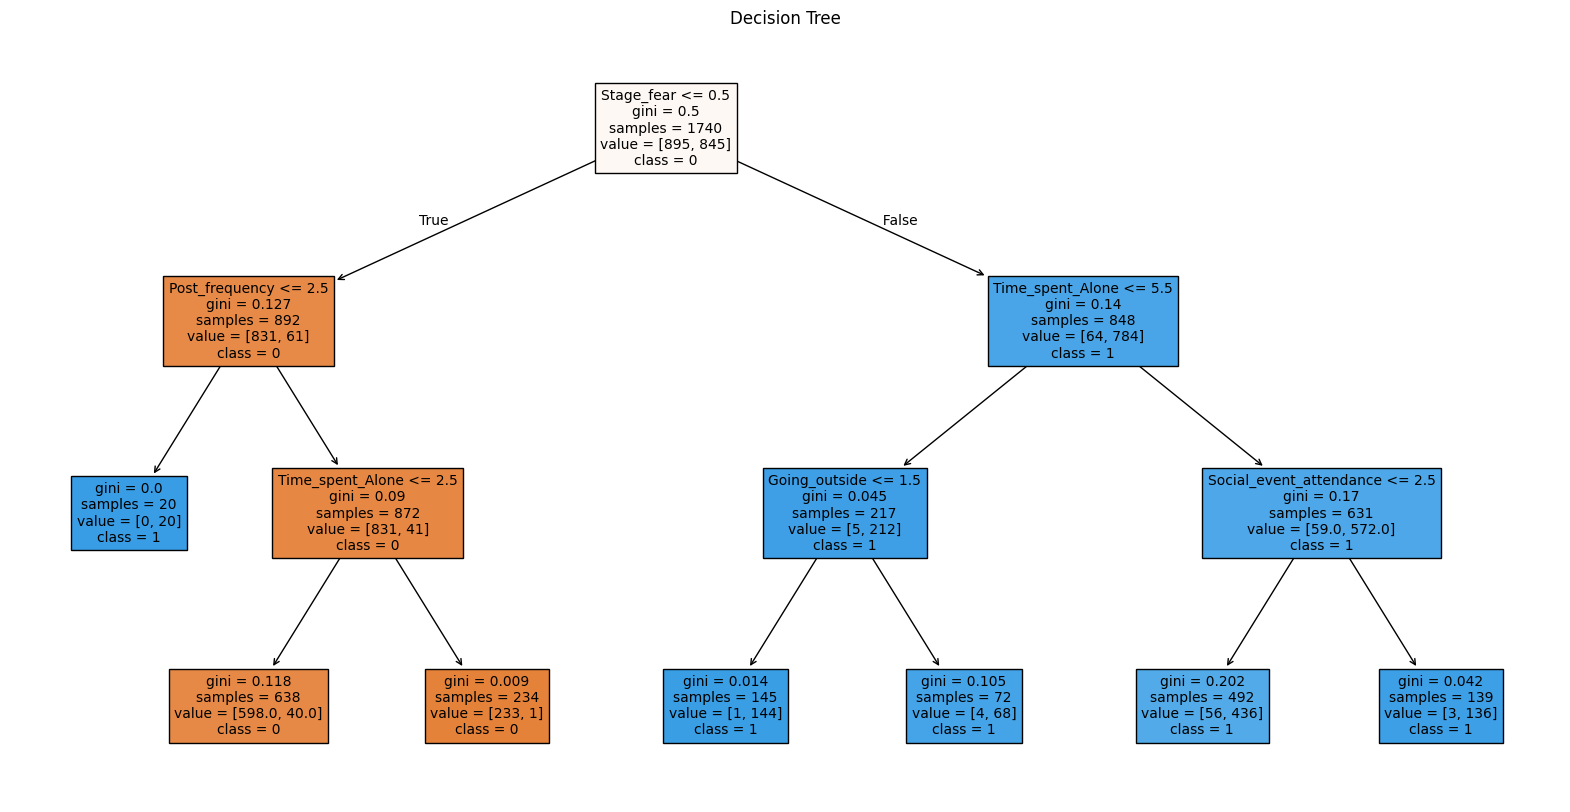

In [10]:
observations = df_no_data_scaling.iloc[:, :-1].values
true_target_values = df_no_data_scaling.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
  observations, true_target_values, test_size=0.4, random_state=81049
)

tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=3,
                              random_state=81049)

tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)


print("Classification Report (train): ", classification_report(y_train, y_train_pred))
print("Classification Report (test): ", classification_report(y_test, y_test_pred))

plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=df_no_data_scaling.columns[:-1],
          class_names=[str(cls) for cls in tree.classes_],
          filled=True,
          max_depth=3)
plt.title("Decision Tree")
plt.show()

### Random Forest

In [26]:
forest = RandomForestClassifier(n_estimators=100,
                               random_state=81049,
                               criterion='gini')

forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print("Classification Report (train): ", classification_report(y_train, y_train_pred))
print("Classification Report (test): ", classification_report(y_test, y_test_pred))

Classification Report (train):                precision    recall  f1-score   support

           0       0.99      0.97      0.98      1177
           1       0.97      0.99      0.98      1143

    accuracy                           0.98      2320
   macro avg       0.98      0.98      0.98      2320
weighted avg       0.98      0.98      0.98      2320

Classification Report (test):                precision    recall  f1-score   support

           0       0.94      0.89      0.92       314
           1       0.88      0.93      0.91       266

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580



## Portfolio item 4: Multilayer Neural Networks

Task:

> Train Neural Network classifier and estimate its performance. Choose hyperparameters. Learn how L1, L2 and Dropout regularization techniques affect the models performance.

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report (test):                precision    recall  f1-score   support

           0       0.95      0.91      0.93       314
           1       0.90      0.95      0.92       266

    accuracy                           0.93       580
   macro avg       0.92      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Classification Report L1 (test):                precision    recall  f1-score   support

           0       0.95      0.91      0.93       314
           1       0.90      0.95      0.92       266

    accuracy                           0.93       580
   macro avg       0.92      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Classification Report L2 (test):                precision    recall  f1-score   support

           0       0.95      0.91

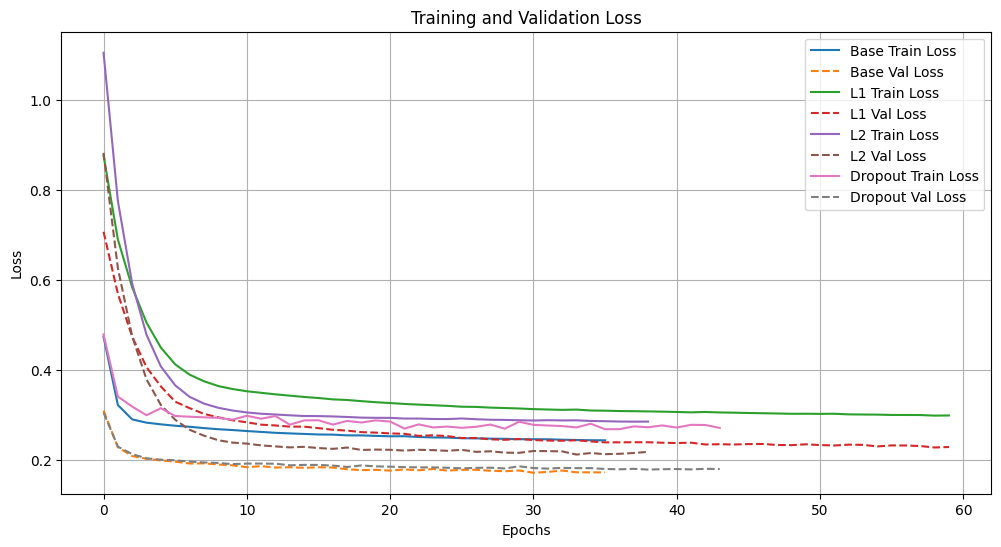

In [28]:
observations = df.iloc[:, :-1].values
true_target_values = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(observations,
                                                    true_target_values,
                                                    test_size=0.2,
                                                    random_state=81049)

callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss',
  patience=5,
  restore_best_weights=True
)

model = tf.keras.Sequential([
  tf.keras.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l1 = tf.keras.Sequential([
  tf.keras.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(40, activation='relu',
                        kernel_regularizer=tf.keras.regularizers.l1(0.01)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l2 = tf.keras.Sequential([
  tf.keras.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(40, activation='relu',
                        kernel_regularizer=tf.keras.regularizers.l2(0.05)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_dropout = tf.keras.Sequential([
  tf.keras.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_l1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_l2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_dropout.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2, verbose=0, callbacks=[callback])

history_l1 = model_l1.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2, verbose=0, callbacks=[callback])

history_l2 = model_l2.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2, verbose=0, callbacks=[callback])

history_dropout = model_dropout.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2, verbose=0, callbacks=[callback])

def unit_step_function(z):
  return np.where(z >= 0.5, 1, 0)

y_pred = unit_step_function(model.predict(X_test))
y_pred_l1 = unit_step_function(model_l1.predict(X_test))
y_pred_l2 = unit_step_function(model_l2.predict(X_test))
y_pred_dropout = unit_step_function(model_dropout.predict(X_test))

print("Classification Report (test): ", classification_report(y_test, y_pred))
print("Classification Report L1 (test): ", classification_report(y_test, y_pred_l1))
print("Classification Report L2 (test): ", classification_report(y_test, y_pred_l2))
print("Classification Report Dropout (test): ", classification_report(y_test, y_pred_dropout))

def plot_history(histories, labels):
  plt.figure(figsize=(12, 6))
  for history, label in zip(histories, labels):
    plt.plot(history.history['loss'], label=f'{label} Train Loss')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'{label} Val Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()

plot_history(
  [history, history_l1, history_l2, history_dropout],
  ['Base', 'L1', 'L2', 'Dropout']
)

## Having Fun

In [ ]:
def yes_no_to_binary(answer):
  return 1 if answer.strip().lower() == 'yes' else 0

def get_user_input():
  try:
    time_spent_alone = float(input("How many hours do you spend alone daily? (0–11): "))
    stage_fear = yes_no_to_binary(input("Do you have stage fear? (Yes/No): "))
    social_event_attendance = float(input("How often do you attend social events? (0–10): "))
    going_outside = float(input("How often do you go outside? (0–10): "))
    drained_after_socializing = yes_no_to_binary(input("Do you feel drained after socializing? (Yes/No): "))
    friends_circle_size = float(input("How many close friends do you have? (0–15): "))
    post_frequency = float(input("How frequently do you post on social media? (0–10): "))

    return np.array([[time_spent_alone,
                      stage_fear,
                      social_event_attendance,
                      going_outside,
                      drained_after_socializing,
                      friends_circle_size,
                      post_frequency]])
  except ValueError:
    print("Invalid input. Please enter numeric values where asked.")
    return None

def predict_personality(features):
  if features is not None:
    prediction_lrgd = lrgd.predict(features)
    prediction_tree = tree.predict(features)
    prediction_forest = forest.predict(features)
    prediction_nn = model.predict(features)
    prediction_nn_l1 = model_l1.predict(features)
    prediction_nn_l2 = model_l2.predict(features)
    prediction_nn_dropout = model_dropout.predict(features)
    label_lrgd = "Extrovert" if prediction_lrgd < 0.5 else "Introvert"
    label_tree = "Extrovert" if prediction_tree < 0.5 else "Introvert"
    label_forest = "Extrovert" if prediction_forest < 0.5 else "Introvert"
    label_nn = "Extrovert" if prediction_nn < 0.5 else "Introvert"
    label_nn_l1 = "Extrovert" if prediction_nn_l1 < 0.5 else "Introvert"
    label_nn_l2 = "Extrovert" if prediction_nn_l2 < 0.5 else "Introvert"
    label_nn_dropout = "Extrovert" if prediction_nn_dropout < 0.5 else "Introvert"
    confidence_lrgd = 1 - prediction_lrgd[0] if label_lrgd == "Extrovert" else prediction_lrgd[0]
    confidence_tree = 1 - prediction_tree[0] if label_tree == "Extrovert" else prediction_tree[0]
    confidence_forest = 1 - prediction_forest[0] if label_forest == "Extrovert" else prediction_forest[0]
    confidence_nn = 1 - prediction_nn[0][0] if label_nn == "Extrovert" else prediction_nn[0][0]
    confidence_nn_l1 = 1 - prediction_nn_l1[0][0] if label_nn_l1 == "Extrovert" else prediction_nn_l1[0][0]
    confidence_nn_l2 = 1 - prediction_nn_l2[0][0] if label_nn_l2 == "Extrovert" else prediction_nn_l2[0][0]
    confidence_nn_dropout = 1 - prediction_nn_dropout[0][0] if label_nn_dropout == "Extrovert" else prediction_nn_dropout[0][0]

    confidence_lrgd *= 100.
    confidence_tree *= 100.
    confidence_forest *= 100.
    confidence_nn *= 100.
    confidence_nn_l1 *= 100.
    confidence_nn_l2 *= 100.
    confidence_nn_dropout *= 100.

    print(f"🚀 Logistic Regression Predicted Personality: {label_lrgd} (Confidence: {confidence_lrgd:.2f}%)")
    print(f"🌲 Decision Tree Predicted Personality: {label_tree} (Confidence: {confidence_tree:.2f}%)")
    print(f"🌳 Random Forest Predicted Personality: {label_forest} (Confidence: {confidence_forest:.2f}%)")
    print(f"🤖 NN Predicted Personality: {label_nn} (Confidence: {confidence_nn:.2f}%)")
    print(f"🤖 NN L1 Predicted Personality: {label_nn_l1} (Confidence: {confidence_nn_l1:.2f}%)")
    print(f"🤖 NN L2 Predicted Personality: {label_nn_l2} (Confidence: {confidence_nn_l2:.2f}%)")
    print(f"🤖 NN Dropout Predicted Personality: {label_nn_dropout} (Confidence: {confidence_nn_dropout:.2f}%)")


print("=== Personality Predictor ===\nAnswer the following questions:")
features = get_user_input()
predict_personality(features)